# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [36]:
# import libraries here
import pandas as pd
import numpy as np

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [37]:
# your answer here
employee = pd.read_csv('Employee.csv')
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [38]:
# your answer here-1st way
employee.groupby('Department').mean().Salary

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [39]:
# your answer here-2nd way
employee.pivot_table(index=["Department"], values=["Salary"], aggfunc=np.mean).head()

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [40]:
# your answer here
#vehicles.pivot_table(index=["Vehicle Class"], columns=["Cylinders"]).head()
employee.pivot_table(index=["Department"], columns=["Title"],fill_value=0, values=["Salary"], aggfunc=np.mean).head()

Salary                  
Title          VP analyst associate
Department                         
HR             70    32.5         0
IT             70    32.5        60
Sales           0     0.0        55

In [41]:
employee.head(10)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [42]:
# your answer here
#employee.pivot_table(index=["Title"], values=["Salary","Years"], aggfunc=np.mean).head()
employee.pivot_table(index=["Title"], values=["Salary","Years"]).head()

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


In [43]:
employee.pivot_table(index=["Title"], values=["Salary","Years"])

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [47]:
# your answer here
employee.pivot_table(index=["Department"], columns=["Title"],fill_value=0, values=["Salary"], aggfunc=[len, np.mean])

len                     mean                  
           Salary                   Salary                  
Title          VP analyst associate     VP analyst associate
Department                                                  
HR              1       2         0     70    32.5         0
IT              1       2         1     70    32.5        60
Sales           0       0         2      0     0.0        55

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [49]:
# your answer here
employee.pivot_table(index=["Department"], columns=["Title"], values=["Salary"], aggfunc=[np.mean,np.min,np.max,np.std])

mean                     amin                     amax          \
           Salary                   Salary                   Salary           
Title          VP analyst associate     VP analyst associate     VP analyst   
Department                                                                    
HR           70.0    32.5       NaN   70.0    30.0       NaN   70.0    35.0   
IT           70.0    32.5      60.0   70.0    30.0      60.0   70.0    35.0   
Sales         NaN     NaN      55.0    NaN     NaN      55.0    NaN     NaN   

                           std            
                        Salary            
Title      associate   analyst associate  
Department                                
HR               NaN  3.535534       NaN  
IT              60.0  3.535534       NaN  
Sales           55.0       NaN       0.0

#### Based on your comments, fill the missing values with an appropriate value

In [54]:
# your answer here
employee.pivot_table(index=["Department"], columns=["Title"],fill_value=0 , values=["Salary"], aggfunc=[np.mean,np.min,np.max,np.std])

mean                     amin                     amax          \
           Salary                   Salary                   Salary           
Title          VP analyst associate     VP analyst associate     VP analyst   
Department                                                                    
HR             70    32.5         0     70      30         0     70      35   
IT             70    32.5        60     70      30        60     70      35   
Sales           0     0.0        55      0       0        55      0       0   

                           std            
                        Salary            
Title      associate   analyst associate  
Department                                
HR                 0  3.535534         0  
IT                60  3.535534         0  
Sales             55  0.000000         0

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [53]:
# your answer here
employee.pivot_table(index=["Department"],fill_value='Sin puesto', values=["Salary"], aggfunc=[len ,np.sum])

,len,sum
,Salary,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [55]:
# your answer here
employee.pivot_table(index=["Department"], columns=["Title"],
                     fill_value=0 , values=["Years",'Salary'], 
                     aggfunc={'Years':np.sum , 'Salary': np.mean})

#aggfunc={'Quantity':len,'Price':[np.sum, np.mean]},fill_value=0)


Salary                   Years                  
Title          VP analyst associate    VP analyst associate
Department                                                 
HR             70    32.5         0     8       6         0
IT             70    32.5        60     8       3         7
Sales           0     0.0        55     0       0         5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [58]:
# your answer here--Your custom function here
employee.groupby('Department').max()['Salary']

Department
HR       70
IT       70
Sales    55
Name: Salary, dtype: int64

In [73]:
# your answer here
employee.pivot_table(index=["Department"],
                     fill_value=0 , values=['Salary'], 
                     aggfunc=[np.sum,np.max,len , lambda x: (np.sum(x)-np.max(x))/(len(x)-1)])

#en mi codigo, 
#(suma de sueldos) - (maximo sueldo) / (cantidad de empelados , menos 1 , que es el sueldo maximo)

,sum,amax,len,<lambda>
,Salary,Salary,Salary,Salary
Department,,,,
HR,135,70,3,32.500000
IT,195,70,4,41.666667
Sales,110,55,2,55.000000


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [77]:
# your answer here
fitbit = pd.read_csv('Fitbit.csv')
fitbit.head(2)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [75]:
fitbit.info()
# your answer here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [76]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


Minutes Very Active#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [86]:
# your answer here
fitbit.corr()
fitbit.corr().loc[['Steps']]['Minutes Very Active']


#fitbit.Steps/fitbit['Minutes Very Active']

Steps    0.571452
Name: Minutes Very Active, dtype: float64

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

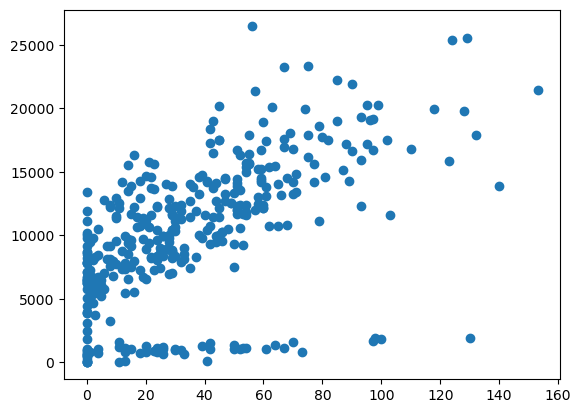

In [90]:
import matplotlib.pyplot as plt

plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])
# your answer here

#### What can you say about Minute Very Active and Steps? Write a comment below

In [19]:
# your comment here
"""TIENDE A TENER UNA RELACION QUITANDO LOS 0 Y CERCA DE 0 TANTO DE PASOS Y MINUTOS """

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [20]:
# your answer here

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [21]:
# your answer here

In [22]:
# Your comment here

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [23]:
# your answer here

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [24]:
# your answer here

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [25]:
# your answer here

In [26]:
#Print cor_fit

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [27]:
# your answer here

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [28]:
# your answer here

In [29]:
#Print time_grades

#### Show visually the frequency distribution of the time_grades dataset.

In [30]:
# your answer here

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [31]:
# your answer here-Pearson 

In [32]:
## your answer here-Spearman

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [33]:
# your answer here

In [34]:
#your comment here

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [35]:
#your comment here